# Unión de la info de los layouts

### Librerías

In [104]:
import pandas as pd
import os
from PIL import Image, ImageStat
import matplotlib.pyplot as plt
import seaborn as sns



In [105]:
df1 = pd.read_csv('layoutsWithTags.csv')
df2 = pd.read_csv('layout_mas.csv', encoding='latin1')

merged_df = pd.merge(df1, df2, on='layout_id')


In [106]:
#merged_df.to_csv('layouts_todo2.csv', index=False)


In [107]:
print(merged_df.head())

   trial_id  layout_id country_x relevant (new) tags  coincidencia  \
0    9446.0      53750    Brazil           2,4,5,6,8          True   
1    9479.0      53772    Brazil          2,4,5,6,11          True   
2    9692.0      53808       USA                 NaN          True   
3    9692.0      53808       USA            1,3,4,10          True   
4    9672.0      53817       USA                 NaN          True   

              field_name              location country_y  latitude  longitude  \
0              LRV_Milho  State of Mato Grosso    Brasil   -12.680    -56.921   
1   Sertanopolis - Milho       State of Paraná    Brasil   -23.058    -51.039   
2                 CF2225                  Iowa       USA    41.878    -93.097   
3                 CF2225                  Iowa       USA    41.878    -93.097   
4  CF2223_B1_10ft_Normal                  Iowa       USA    41.878    -93.097   

       flight_date  
0  2/24/2022 15:32  
1   4/7/2022 16:11  
2  6/28/2022 13:55  
3  6/28/

# Unión info layouts e info foto

In [108]:
import os

# Directorio de las imágenes limpias
directorio_clean_images = './clean_images'

# Contar el número de archivos de imagen en el directorio
cantidad_fotos = len([nombre for nombre in os.listdir(directorio_clean_images) if os.path.isfile(os.path.join(directorio_clean_images, nombre))])

print("La cantidad de fotos en la carpeta 'clean_images' es:", cantidad_fotos)


La cantidad de fotos en la carpeta 'clean_images' es: 1978


In [109]:
import os
import pandas as pd
from PIL import Image

layouts_todo = merged_df
directorio = './clean_images'

filas = []

# Obtener una lista de todas las imágenes en el directorio
imagenes_en_directorio = [filename for filename in os.listdir(directorio)]

# Iterar sobre cada imagen en el directorio
for filename in imagenes_en_directorio:
    # Obtener el layout_id de la imagen a partir del nombre del archivo
    layout_id = int(filename.split('_')[0])
    
    # Buscar la información del diseño (layout) en layouts_todo que coincida con el layout_id
    layout_info = layouts_todo[layouts_todo['layout_id'] == layout_id].iloc[0]
    
    # Obtener información relevante del diseño (layout)
    country = layout_info['country_x']
    relevant = layout_info['relevant (new) tags']
    coincidencia = layout_info['coincidencia']
    field_name = layout_info['field_name']
    location = layout_info['location']
    latitude = layout_info['latitude']
    longitude = layout_info['longitude']
    flight_date = layout_info['flight_date']
    
    # Abrir la imagen y obtener su tamaño, brillo y saturación
    img = Image.open(os.path.join(directorio, filename))
    ancho, alto = img.size
    brillo = img.getextrema()[0][0]
    s, _, _ = img.convert('HSV').split()
    estadisticas_saturacion = ImageStat.Stat(s)
    saturacion = estadisticas_saturacion.mean[0]
    
    # Agregar la información a la lista de filas
    filas.append({
        'trial_id': layout_info['trial_id'],
        'layout_id': layout_id,
        'country': country,
        'relevant (new) tags': relevant,
        'coincidencia': coincidencia,
        'nombre_imagen': filename,
        'ancho': ancho,
        'alto': alto,
        'brillo': brillo,
        'tonalidad': 0,  # Se deja en 0 porque no se proporciona en el código original
        'saturacion': saturacion,
        'field_name': field_name,
        'location': location,
        'latitude': latitude,
        'longitude': longitude,
        'flight_date': flight_date
    })

# Crear el DataFrame nuevo_df2
nuevo_df2 = pd.DataFrame(filas)



In [110]:
len(nuevo_df2)

1978

In [111]:
print(nuevo_df2.head())

   trial_id  layout_id    country relevant (new) tags  coincidencia  \
0    5882.0      31255  Argentina              4,6,11          True   
1    5882.0      31255  Argentina              4,6,11          True   
2    5882.0      31255  Argentina              4,6,11          True   
3    5882.0      31255  Argentina              4,6,11          True   
4    5882.0      31255  Argentina              4,6,11          True   

        nombre_imagen  ancho  alto  brillo  tonalidad  saturacion field_name  \
0  31255_12-3-1-5.png   2884    94       0          0   41.462748     Cañete   
1  31255_12-3-1-7.png   2884    94       0          0   42.517905     Cañete   
2  31255_12-5-1-4.png   2885    95       0          0   46.213004     Cañete   
3  31255_14-3-1-1.png   2881    94       0          0   44.414801     Cañete   
4  31255_15-4-1-8.png   2885    94       0          0   45.882027     Cañete   

  location  latitude  longitude     flight_date  
0     ARBA   -34.482    -58.245  2/4/2021 

In [112]:
nuevo_df2['flight_date'] = pd.to_datetime(nuevo_df2['flight_date'])

nuevo_df2['year'] = nuevo_df2['flight_date'].dt.year

nuevo_df2['month'] = nuevo_df2['flight_date'].dt.month

paises_unicos = nuevo_df2['country'].unique()

tabla_vuelos = pd.DataFrame()

for pais in paises_unicos:
    df_pais = nuevo_df2[nuevo_df2['country'] == pais]
    vuelos_por_mes = df_pais.groupby(['year', 'month']).size().reset_index(name='count')

    vuelos_por_mes['country'] = pais
    tabla_vuelos = pd.concat([tabla_vuelos, vuelos_por_mes])
tabla_vuelos = tabla_vuelos[['country', 'year', 'month', 'count']]

print(tabla_vuelos)


     country  year  month  count
0  Argentina  2018     11    120
1  Argentina  2019      1     34
2  Argentina  2021      1    158
3  Argentina  2021      2    253
0     Brazil  2018     10    217
1     Brazil  2018     11    159
2     Brazil  2018     12     58
3     Brazil  2019      1     20
4     Brazil  2019      2    140
5     Brazil  2019      3    160
6     Brazil  2021      4     20
7     Brazil  2022      2     20
8     Brazil  2022      4     20
0        USA  2021      5    100
1        USA  2021      6     39
2        USA  2022      6    440
3        USA  2022      7     20


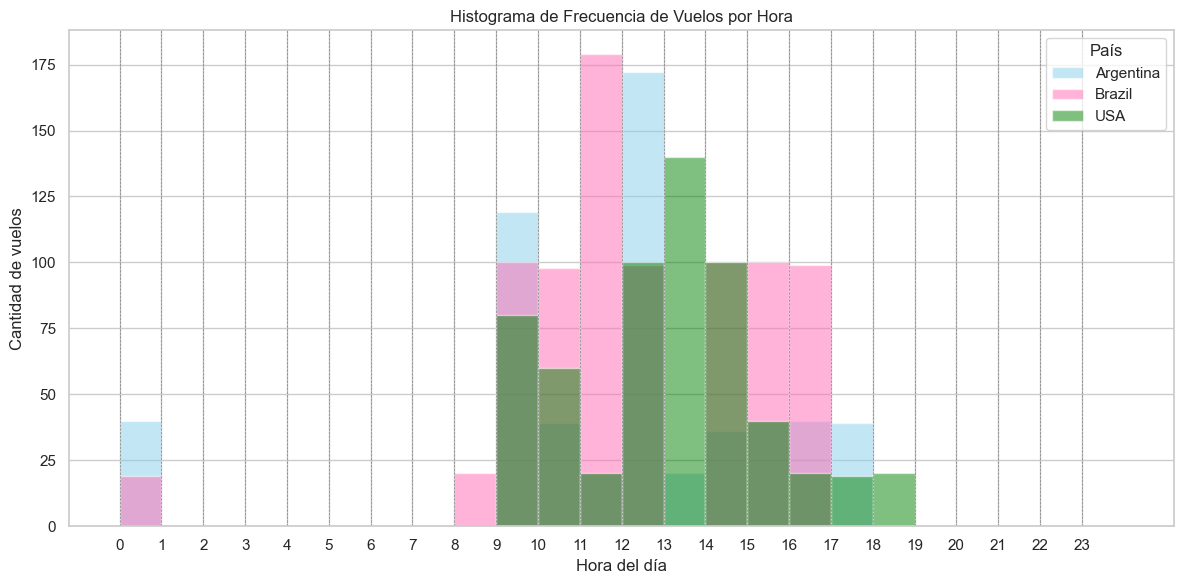

In [113]:
sns.set(style="whitegrid")

paises = nuevo_df2['country'].unique()


colores = {'Brazil': '#FF69B4', 'USA': 'green', 'Argentina': '#87CEEB'}


plt.figure(figsize=(12, 6))
for pais in paises:

    data_pais = nuevo_df2[nuevo_df2['country'] == pais]
    
    frecuencia_horarios = data_pais['flight_date'].dt.hour
    
  
    plt.hist(frecuencia_horarios, bins=range(25), alpha=0.5, label=pais, color=colores.get(pais, 'gray'))


plt.title('Histograma de Frecuencia de Vuelos por Hora')
plt.xlabel('Hora del día')
plt.ylabel('Cantidad de vuelos')
plt.xticks(range(24))
plt.legend(title='País')


for hour in range(24):
    plt.axvline(hour, color='gray', linestyle='--', linewidth=0.5)


plt.grid(True)
plt.tight_layout()
plt.show()





## Es bastante similar en todos 
### Rango más común (9;19)

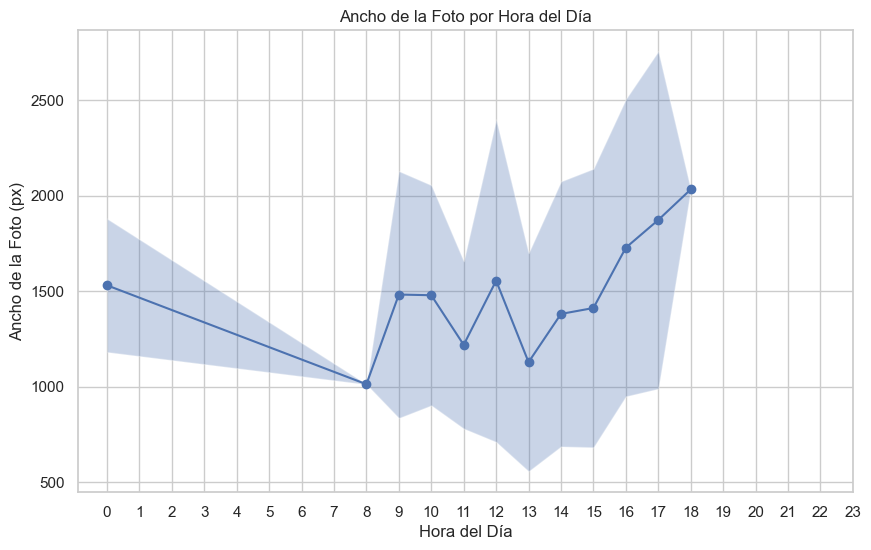

In [114]:

nuevo_df2['flight_date'] = pd.to_datetime(nuevo_df2['flight_date'])
nuevo_df2['hour_of_day'] = nuevo_df2['flight_date'].dt.hour

grupo_por_hora = nuevo_df2.groupby('hour_of_day')['ancho'].describe()


plt.figure(figsize=(10, 6))
plt.plot(grupo_por_hora.index, grupo_por_hora['mean'], marker='o', linestyle='-')
plt.fill_between(grupo_por_hora.index, grupo_por_hora['mean'] - grupo_por_hora['std'], grupo_por_hora['mean'] + grupo_por_hora['std'], alpha=0.3)
plt.title('Ancho de la Foto por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Ancho de la Foto (px)')
plt.xticks(range(24))
plt.grid(True)
plt.show()


C:\Users\nicky\AppData\Local\Temp\ipykernel_31676\1651243752.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='time_of_day', y='ancho', data=nuevo_df2, palette='husl')


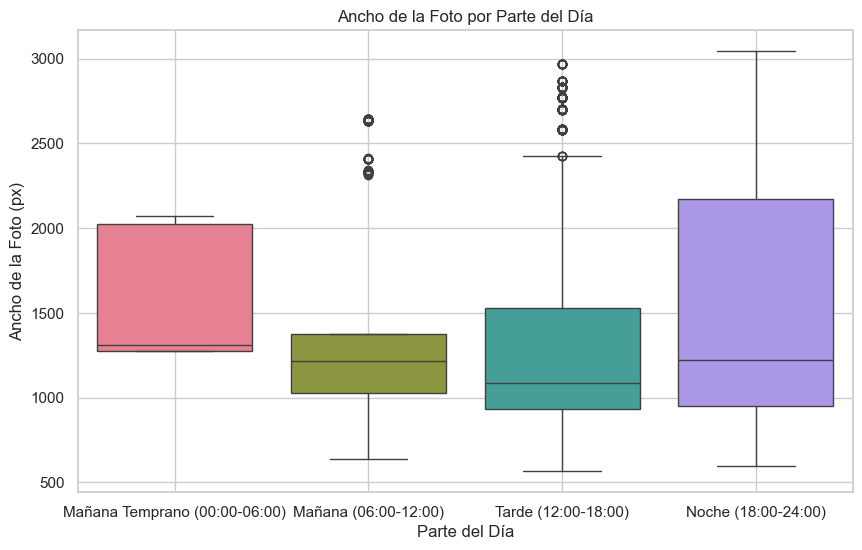

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


nuevo_df2['flight_date'] = pd.to_datetime(nuevo_df2['flight_date'])
nuevo_df2['hour_of_day'] = nuevo_df2['flight_date'].dt.hour

nuevo_df2['time_of_day'] = pd.cut(nuevo_df2['hour_of_day'], bins=4, labels=['Mañana Temprano (00:00-06:00)', 'Mañana (06:00-12:00)', 'Tarde (12:00-18:00)', 'Noche (18:00-24:00)'])


plt.figure(figsize=(10, 6))
sns.boxplot(x='time_of_day', y='ancho', data=nuevo_df2, palette='husl')
plt.title('Ancho de la Foto por Parte del Día')
plt.xlabel('Parte del Día')
plt.ylabel('Ancho de la Foto (px)')
plt.grid(True)
plt.show()


In [116]:
from scipy.stats import f_oneway

resultados_anova = f_oneway(nuevo_df2[nuevo_df2['time_of_day'] == 'Mañana Temprano (00:00-06:00)']['ancho'],
                            nuevo_df2[nuevo_df2['time_of_day'] == 'Mañana (06:00-12:00)']['ancho'],
                            nuevo_df2[nuevo_df2['time_of_day'] == 'Tarde (12:00-18:00)']['ancho'],
                            nuevo_df2[nuevo_df2['time_of_day'] == 'Noche (18:00-24:00)']['ancho'])


print("Resultados del test ANOVA:")
print("Estadística F:", resultados_anova.statistic)
print("Valor p:", resultados_anova.pvalue)


alpha = 0.05
if resultados_anova.pvalue < alpha:
    print("La media del ancho de la foto depende significativamente del horario del día (rechazamos la hipótesis nula).")
else:
    print("No hay suficiente evidencia para concluir que la media del ancho de la foto depende del horario del día (no rechazamos la hipótesis nula).")


Resultados del test ANOVA:
Estadística F: 6.066507066583759
Valor p: 0.0004153388298305434
La media del ancho de la foto depende significativamente del horario del día (rechazamos la hipótesis nula).


In [117]:

print(nuevo_df2.columns)
print(nuevo_df2['relevant (new) tags'].value_counts)

Index(['trial_id', 'layout_id', 'country', 'relevant (new) tags',
       'coincidencia', 'nombre_imagen', 'ancho', 'alto', 'brillo', 'tonalidad',
       'saturacion', 'field_name', 'location', 'latitude', 'longitude',
       'flight_date', 'year', 'month', 'hour_of_day', 'time_of_day'],
      dtype='object')
<bound method IndexOpsMixin.value_counts of 0       4,6,11
1       4,6,11
2       4,6,11
3       4,6,11
4       4,6,11
         ...  
1973     2,4,5
1974     2,4,5
1975     2,4,5
1976     2,4,5
1977     2,4,5
Name: relevant (new) tags, Length: 1978, dtype: object>


In [118]:
# Mapeo de nombres de tags
tag_mapping = {
    '1': 'dark_soil',
    '2': 'red_soil',
    '3': 'high_plant_density',
    '4': 'shadow',
    '5': 'stubble',
    '6': 'weed',
    '7': 'blurry',
    '8': 'dark_image',
    '9': 'bright_image',
    '10': 'grown_plants',
    '11': 'double_plants'
}

# Paso 1: Obtener todos los tags únicos
all_tags = ','.join(nuevo_df2['relevant (new) tags'].fillna('')).split(',')
unique_tags = set(all_tags)

# Paso 2: Eliminar tags no numéricos y convertir a enteros
unique_tags = {int(tag) for tag in unique_tags if tag.isdigit()}

# Paso 3: Crear una nueva columna para cada tag único
for tag in unique_tags:
    # Usar el mapeo de nombres de tags
    column_name = tag_mapping[str(tag)]
    nuevo_df2[column_name] = nuevo_df2['relevant (new) tags'].apply(lambda x: 1 if str(tag) in str(x) else 0)

# Visualizar el DataFrame resultante
print(nuevo_df2.head())

   trial_id  layout_id    country relevant (new) tags  coincidencia  \
0    5882.0      31255  Argentina              4,6,11          True   
1    5882.0      31255  Argentina              4,6,11          True   
2    5882.0      31255  Argentina              4,6,11          True   
3    5882.0      31255  Argentina              4,6,11          True   
4    5882.0      31255  Argentina              4,6,11          True   

        nombre_imagen  ancho  alto  brillo  tonalidad  ...  red_soil  \
0  31255_12-3-1-5.png   2884    94       0          0  ...         0   
1  31255_12-3-1-7.png   2884    94       0          0  ...         0   
2  31255_12-5-1-4.png   2885    95       0          0  ...         0   
3  31255_14-3-1-1.png   2881    94       0          0  ...         0   
4  31255_15-4-1-8.png   2885    94       0          0  ...         0   

  high_plant_density shadow  stubble  weed blurry  dark_image  bright_image  \
0                  0      1        0     1      0           0

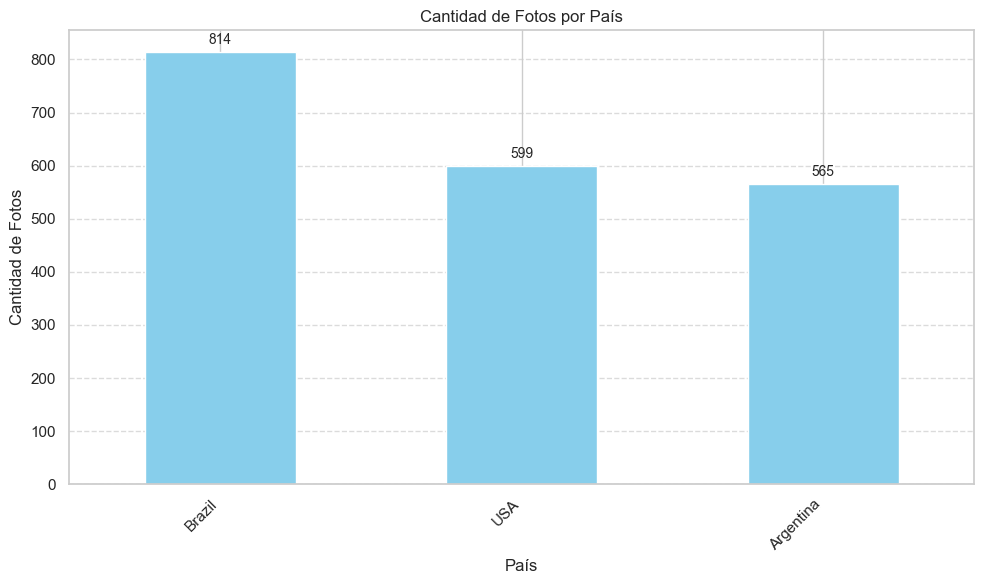

In [127]:
import matplotlib.pyplot as plt

# Contar la cantidad de fotos por país
conteo_paises = nuevo_df2['country'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ax = conteo_paises.plot(kind='bar', color='skyblue')

# Etiquetar cada barra con su valor correspondiente
for i, v in enumerate(conteo_paises):
    ax.text(i, v + 10, str(v), ha='center', va='bottom', fontsize=10)

plt.title('Cantidad de Fotos por País')
plt.xlabel('País')
plt.ylabel('Cantidad de Fotos')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [120]:
# Calcular el total de fotos
total_fotos = nuevo_df2.shape[0]

print("El total de fotos en el DataFrame es:", total_fotos)


El total de fotos en el DataFrame es: 1978


In [121]:
import pandas as pd

# Calcular el total de registros por país
total_registros_por_pais = nuevo_df2.groupby('country').size()

# Crear un DataFrame vacío para almacenar los resultados
proporcion_tags_por_pais = pd.DataFrame(columns=['País'])

# Agregar la columna de país
proporcion_tags_por_pais['País'] = total_registros_por_pais.index

# Calcular la proporción de registros con el tag igual a 1 respecto al total de registros por país para cada tag
for tag in tags_columns:
    # Calcular el total de registros con el tag igual a 1 por país
    total_registros_con_tag_por_pais = nuevo_df2.groupby('country')[tag].sum()
    # Calcular la proporción
    proporcion = total_registros_con_tag_por_pais / total_registros_por_pais
    # Agregar la columna al DataFrame
    proporcion_tags_por_pais[tag] = proporcion.values

# Mostrar la tabla
print(proporcion_tags_por_pais)




        País  dark_soil  red_soil  high_plant_density    shadow   stubble  \
0  Argentina   0.732743  0.033628            0.141593  0.798230  0.623009   
1     Brazil   0.656020  1.000000            0.171990  0.584767  0.975430   
2        USA   0.801336  0.100167            0.499165  0.565943  0.599332   

       weed    blurry  dark_image  bright_image  grown_plants  double_plants  
0  0.366372  0.207080    0.060177      0.106195      0.247788       0.555752  
1  0.558968  0.266585    0.318182      0.073710      0.147420       0.557740  
2  0.267112  0.133556    0.033389      0.133556      0.400668       0.333890  


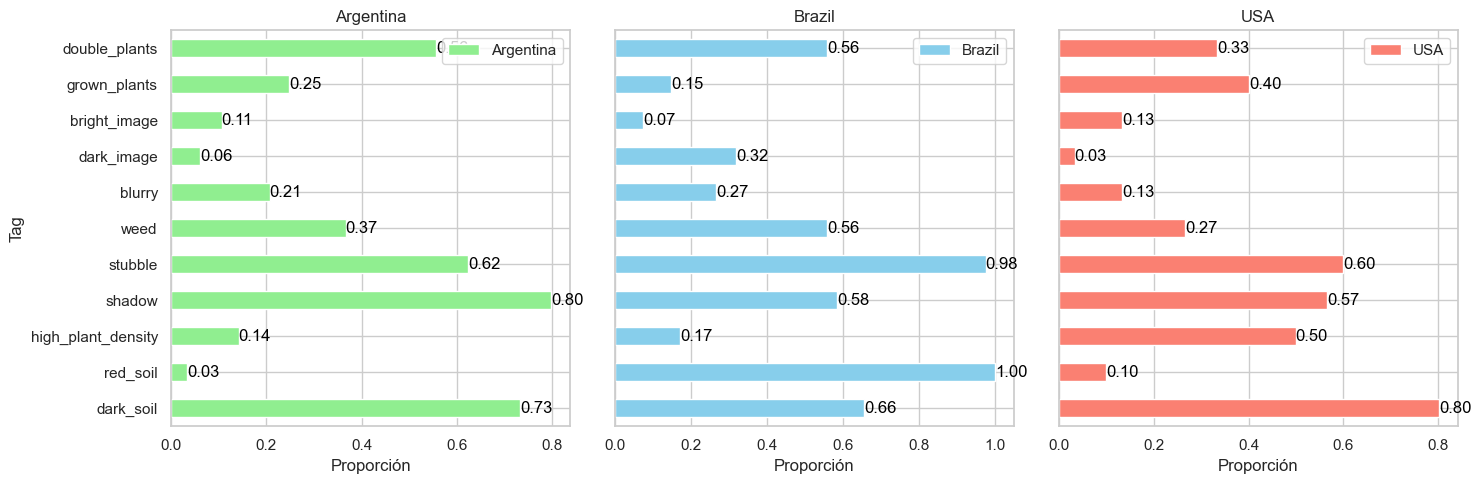

In [122]:
import matplotlib.pyplot as plt
color_mapping = {'Argentina': 'lightgreen', 'Brazil': 'skyblue', 'USA': 'salmon'}

import matplotlib.pyplot as plt

# Crea una figura con tres subgráficos lado a lado para cada país
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Itera sobre cada país y su proporción de etiquetas
for ax, (_, proporcion) in zip(axes, proporcion_tags_por_pais.iterrows()):  
    # Obtiene el color correspondiente al país
    pais = proporcion['País']  
    color = color_mapping[pais]
    # Crea un gráfico de barras horizontales para cada país con el color correspondiente
    proporcion[1:].plot(kind='barh', ax=ax, color=color)
    ax.set_title(f'{pais}')  # Establece el título como el nombre del país
    ax.set_xlabel('Proporción')
    ax.set_ylabel('Tag')
    ax.legend([f'{pais}'], loc='upper right')  # Agrega la etiqueta del país en la esquina superior derecha
    
    # Agregar etiquetas de proporción en cada barra
    for i, prop in enumerate(proporcion[1:]):
        ax.text(prop, i, f'{prop:.2f}', ha='left', va='center', color='black')

plt.tight_layout()  # Ajusta el diseño para evitar superposiciones
plt.show()  # Muestra los gráficos





## Mostrar más lindo

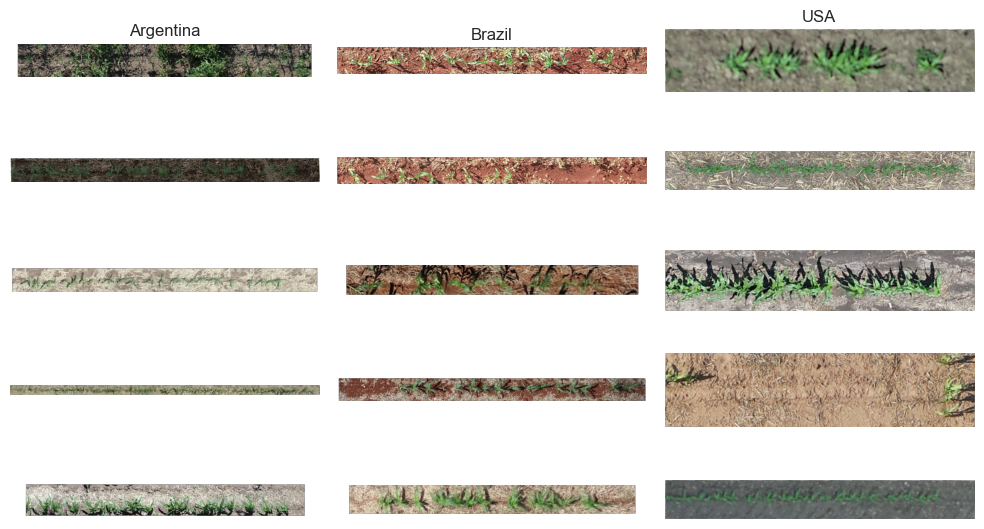

In [126]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# Función para mostrar una muestra aleatoria de imágenes por país en formato de tabla
def mostrar_muestra_aleatoria_por_pais_tabla(df, directorio, num_muestras=5, umbral_ancho=1500):
    # Crear un DataFrame vacío para almacenar las rutas de las imágenes
    df_imagenes = pd.DataFrame(columns=df['country'].unique())
    
    # Iterar sobre cada país
    for pais in df_imagenes.columns:
        # Filtrar el DataFrame por el país actual
        df_pais = df[df['country'] == pais]
        # Obtener las imágenes con un ancho menor al umbral
        imagenes_menores_umbral = df_pais[df_pais['ancho'] < umbral_ancho]['nombre_imagen'].tolist()
        # Si hay menos imágenes que el número de muestras, tomar todas las imágenes disponibles
        if len(imagenes_menores_umbral) < num_muestras:
            muestra = imagenes_menores_umbral
        else:
            # Obtener una muestra aleatoria de imágenes
            muestra = random.sample(imagenes_menores_umbral, num_muestras)
        # Agregar la muestra al DataFrame de imágenes
        df_imagenes[pais] = muestra
    
    # Mostrar las imágenes en formato de tabla
    fig, axes = plt.subplots(num_muestras, len(df_imagenes.columns), figsize=(10, 6))
    
    if num_muestras == 1:  # Si solo hay una muestra, los ejes no son 2D
        axes = axes.reshape((1, -1))  # Cambiar a una matriz de una fila
    
    for i, pais in enumerate(df_imagenes.columns):
        # Mostrar el nombre del país solo al principio de cada columna
        axes[0, i].set_title(pais)
        for j, imagen_nombre in enumerate(df_imagenes[pais]):
            # Construir la ruta completa de la imagen
            ruta_imagen = os.path.join(directorio, imagen_nombre)
            # Abrir y mostrar la imagen
            imagen = Image.open(ruta_imagen)
            if num_muestras > 1:
                ax = axes[j, i]
            else:
                ax = axes[i]  # Acceder a los ejes directamente
            ax.imshow(imagen)
            ax.axis('off')

    plt.tight_layout()
    plt.show()
    return df_imagenes

# Directorio donde se encuentran las imágenes
directorio_imagenes = './clean_images'

# Llamar a la función para mostrar la muestra aleatoria de imágenes por país en formato de tabla
fotos = mostrar_muestra_aleatoria_por_pais_tabla(nuevo_df2, directorio_imagenes)
